In [46]:
import pandas as pd
import numpy as np

import calendar
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,KFold,train_test_split,cross_val_score,cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score,recall_score,mean_squared_error

%matplotlib inline 
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [47]:
train=pd.read_csv(r"Dataset/train.csv")
train_target=pd.read_csv(r"Dataset/train_label.csv",header=None)
train['Total_booking']=train_target

In [48]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979,504


In [49]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [50]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

# Data Visualization

### Total_booking column

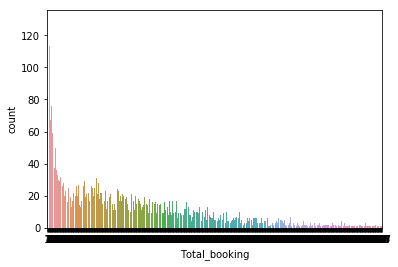

In [51]:
sns.countplot( train['Total_booking'])

#### We can observe that the range of total booking high. There is high variance among this column.

### DateTime column

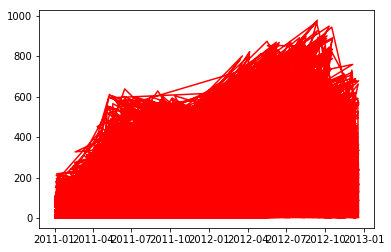

In [52]:
train['datetime_new']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
plt.plot(train['datetime_new'], train['Total_booking'],color='r')
plt.show()
train.drop('datetime_new',axis=1,inplace=True)

#### No insights can be drawn from datetime column by seeing the aboove plot , we are removing that column but only after extracting necessary information like time,day,month and year separately as they might impact target column.

### Year vs Total_booking

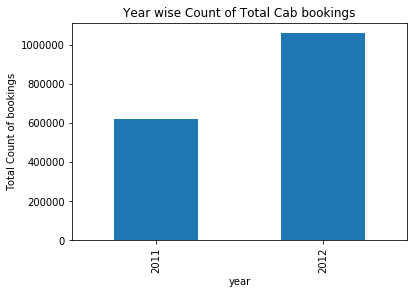

In [53]:
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['year']=train.date.apply(lambda x:x.split("/")[2])
var = train.groupby(['year']).Total_booking.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Year wise Count of Total Cab bookings")
var.plot(kind='bar')

#### 2012 has more booking count than 2011 which can be due to many reasons like good marketing strategy , popularity, price drop etc

### Day vs Total_booking

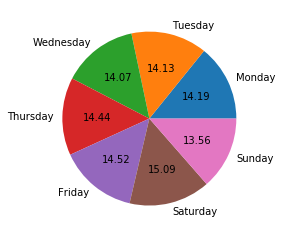

In [54]:
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['day']=train.date.apply(lambda x:calendar.day_name[datetime.datetime.strptime(x, "%m/%d/%Y").weekday()])
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
x = [train[train['day']=='Monday'].Total_booking.sum(),
     train[train['day']== 'Tuesday'].Total_booking.sum(),
     train[train['day']=='Wednesday'].Total_booking.sum(),
     train[train['day']=='Thursday'].Total_booking.sum(),
     train[train['day']=='Friday'].Total_booking.sum(),
     train[train['day']=='Saturday'].Total_booking.sum(),
     train[train['day']=='Sunday'].Total_booking.sum()    ]

day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
labels = ['Bikes', 'Cars', 'Buses']
plt.pie(x, labels=day,autopct='%.2f')
plt.show()

#### On Saturday, the count is higher and on sunday the total count is lower.

#### There is no significant difference in the total bookings count over the weekdays. 

### Month vs Total_booking

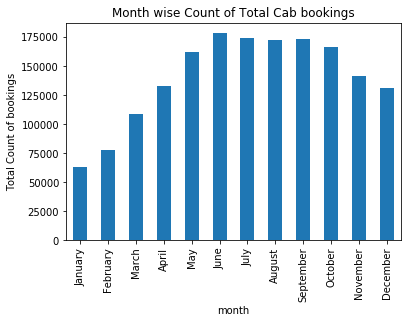

In [55]:
train['month']=train.date.apply(lambda x:calendar.month_name[datetime.datetime.strptime(x, "%m/%d/%Y").month])
month=['January','February','March','April','May','June','July','August','September','October','November','December']
var = train.groupby(pd.Categorical(train['month'], categories=month, ordered=True)).Total_booking.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('Total Count of bookings')
ax1.set_xlabel('month')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that total bookings count increase from the starting of the year to mid year and and there is only small decline as the year ends.  

### Time vs Total Booking

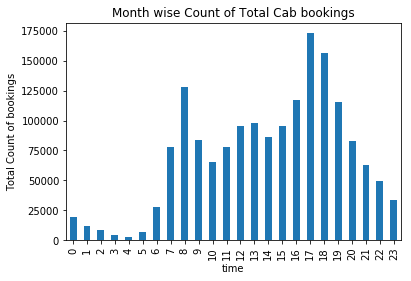

In [56]:
train['time']=train.datetime.apply(lambda x:x.split()[1].split(":")[0])
time=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
var = train.groupby(pd.Categorical(train['time'], categories=time, ordered=True)).Total_booking.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('Total Count of bookings')
ax1.set_xlabel('time')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that bookings are high during morning 8 which we can assume as office start time for various people and bookings are again high during evening 6 to 8 PM . The extremely low booking count at 4 AM tells us that people travel very less during that time.

### Season Column vs Total_booking

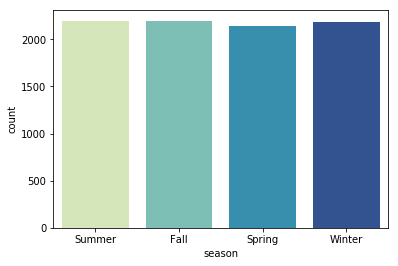

In [57]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset("tips")
sns.countplot(x='season', 
              data=train,
              palette ="YlGnBu")

#### We have noticed that spring has low count of bookings when compared to other seasons because of the nice weather.  

### Weather Column vs Total_booking

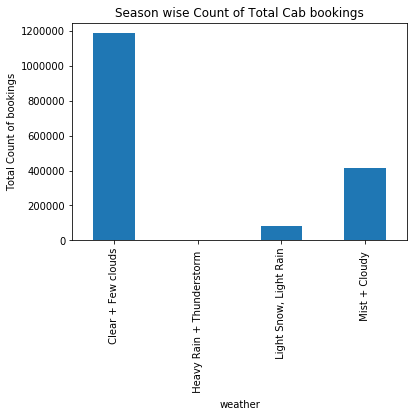

In [58]:
var = train.groupby(['weather']).Total_booking.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Weather')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Season wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that heavy rain+thunderstorm has very few cabs booked and clear + few clouds has maximum cabs booked. 

#### The interesting point is even when there is light snow + light rain, the bookings are very low.  

### Temp with atemp pair plot

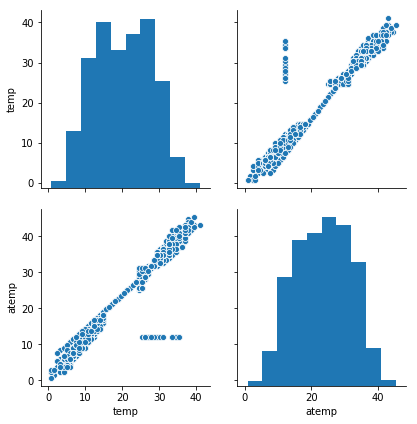

In [59]:
sns.pairplot(train, height=3,vars=["temp", "atemp"])

#### These columns are highly co-related and distance between them is also very low.

### atemp & temp column vs Total_booking

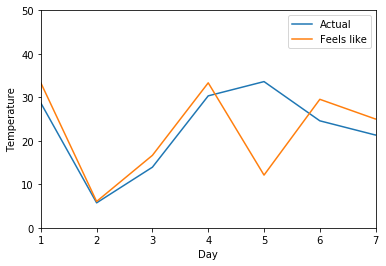

In [60]:
import numpy, matplotlib.pyplot as plt
plt.plot(train.temp, label='Actual')
plt.plot(train.atemp, label='Feels like')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.axis([1,7,0,50])
plt.legend()
plt.show()

#### The Actual temperature and feels like are close by to each other.

#### We have created another column by takeing average of temp and atemp , named it temperature.

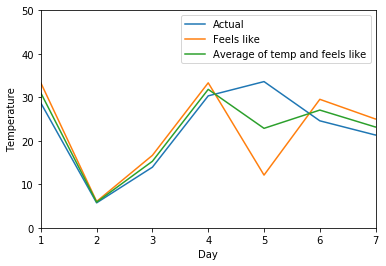

In [61]:
train['temperature']=(train['temp']+train['atemp'])/2
import numpy, matplotlib.pyplot as plt
plt.plot(train.temp, label='Actual')
plt.plot(train.atemp, label='Feels like')
plt.plot(train.temperature, label='Average of temp and feels like')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.axis([1,7,0,50])
plt.legend()
plt.show()

#### Here , we took the average of temp and atemp and created a new columnn. From the above plot, we can observe that it follows similar trend as other two. We can use the column temperature and remove "temp" and "atemp".

### Humidity

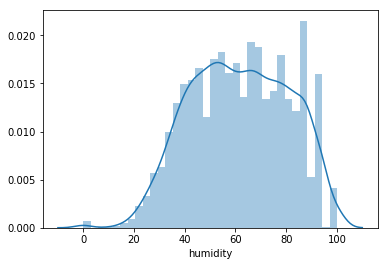

In [62]:
sns.distplot(train.humidity,label='humidity')

#### Most of the data lies in certain range of humidity values.

### Windspeed

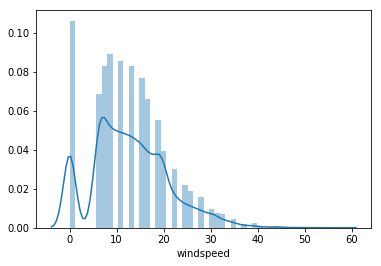

In [63]:
sns.distplot(train.windspeed,label='windspeed')

#### The curve looks right skewed. 

## Finding Outliers

### Replacing outliers with mean

In [64]:
def detect_outlier(df,column_name):
    data_std = df[column_name].describe()[2]
    data_mean = df[column_name].describe()[1]
    
    lb  = data_mean -(data_std * 3)  
    ub = data_mean +(data_std * 3) 
    
    l=df.shape[1]
    count=0
    for i in range(l):
        if df[column_name][i] < lb or df[column_name][i] > ub:
            count+=1
            outliers.append(df[column_name][i])
            
#     Replacing with mean using lambda function if there are any outliers
    df[column_name] = df[column_name].apply(lambda x : data_mean if (x > ub) or (x < lb) else x )
    return count

print("atemp column outliers :",detect_outlier(train,'atemp'))
print("temp column outliers :",detect_outlier(train,'temp'))
print("humidity column outliers :",detect_outlier(train,'humidity'))
print("windspeed column outliers :",detect_outlier(train,'windspeed'))

atemp column outliers : 0
temp column outliers : 0
humidity column outliers : 0
windspeed column outliers : 0


## Missing Value Analysis

In [65]:
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
year             0
day              0
month            0
time             0
temperature      0
dtype: int64

#### AS there are no missing values, the data remains same. 

## Correlation Analysis

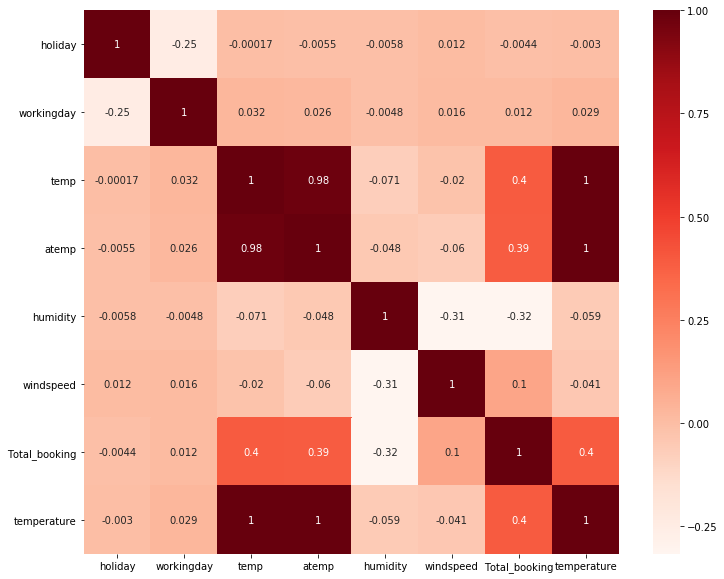

In [66]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [67]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,temperature
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.005765,0.011886,-0.004391,-0.002970
workingday,-0.249755,1.000000,0.032189,0.026168,-0.004783,0.015633,0.012285,0.029168
temp,-0.000165,0.032189,1.000000,0.984035,-0.070518,-0.019887,0.397456,0.995656
atemp,-0.005526,0.026168,0.984035,1.000000,-0.047711,-0.060410,0.392754,0.996331
humidity,-0.005765,-0.004783,-0.070518,-0.047711,1.000000,-0.314909,-0.317318,-0.058869
windspeed,0.011886,0.015633,-0.019887,-0.060410,-0.314909,1.000000,0.099752,-0.041167
Total_booking,-0.004391,0.012285,0.397456,0.392754,-0.317318,0.099752,1.000000,0.396589
temperature,-0.002970,0.029168,0.995656,0.996331,-0.058869,-0.041167,0.396589,1.000000


#### 1. We can observe that humidity has negative co-relation with total booking which tells us that if humidity increase cab bookings decreases. 
#### 2. The columns "temp" and "atemp" has highest posive co-relation with total booking.
#### 3. Windspeed also has a positive co-relation with total_booking.
#### 4. "Workingday" and "holiday" has negative co-relation which tell us that there are not many holidays during the week. 
#### 5. The columns "temp" and "atemp" are highly co-related with each other aswell.
#### 6. There is a negative co-relation between windspeed and humidity.

## Feature Engineering 

# Date Column
#### Extracting Day of the week and month from date column for better visualization analysis. Creating 3 new columns with month,year and time from the date column

In [68]:
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['day']=train.datetime.apply(lambda x:x.split(' ')[0].split("/")[1])
train['day']=train['day'].astype('str').astype('int')
train['month']=train.datetime.apply(lambda x:x.split(" ")[0].split("/")[0])
train['month']=train['month'].astype('str').astype('int')
train['time']=train.datetime.apply(lambda x:x.split()[1].split(":")[0])
train['time']=train['time'].astype('str').astype('int')
train['year']=train.date.apply(lambda x:x.split("/")[2])
train['year']=train['year'].astype('str').astype('int')
train['datetime']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [69]:
train.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
Total_booking             int64
date                     object
year                      int32
day                       int32
month                     int32
time                      int32
temperature             float64
dtype: object

### Deleting Column Datetime and date as all the information is extracted from it

In [70]:
train.drop(['datetime','date'],axis=1,inplace=True)

# Generating get_dummies for the training data

In [71]:
train=pd.get_dummies(train)
train.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,year,day,month,time,temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,25.760,77.0,16.9979,504,2012,2,5,19,23.9500,0,0,1,0,1,0,0,0
1,0,1,28.70,33.335,79.0,19.0012,5,2012,5,9,4,31.0175,1,0,0,0,1,0,0,0


 Modifying the Test Data

In [72]:
test=pd.read_csv(r"Dataset/test.csv")
test_target=pd.read_csv(r"Dataset/test_label.csv",header=None)
test['Total_booking']=test_target
test['date']=test.datetime.apply(lambda x:x.split()[0])
test['year']=test.date.apply(lambda x:x.split("/")[2])
test['year']=test['year'].astype('str').astype('int')
test['day']=test.datetime.apply(lambda x:x.split(' ')[0].split("/")[1])
test['day']=test['day'].astype('str').astype('int')
test['month']=test.datetime.apply(lambda x:x.split(" ")[0].split("/")[0])
test['month']=test['month'].astype('str').astype('int')
test['time']=test.datetime.apply(lambda x:x.split()[1].split(":")[0])
test['time']=test['time'].astype('str').astype('int')
test['datetime']=test['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
test.drop(['datetime','date'],axis=1,inplace=True)
test.dtypes
test['temperature']=(test['temp']+test['atemp'])/2


In [73]:
def detect_outlier(df,column_name):
    data_std = df[column_name].describe()[2]
    data_mean = df[column_name].describe()[1]
    
    lb  = data_mean -(data_std * 3)  
    ub = data_mean +(data_std * 3) 
    
    l=df.shape[1]
    count=0
    for i in range(l):
        if df[column_name][i] < lb or df[column_name][i] > ub:
            count+=1
            outliers.append(df[column_name][i])
            
#     Replacing with mean using lambda function if there are any outliers
    df[column_name] = df[column_name].apply(lambda x : data_mean if (x > ub) or (x < lb) else x )
    return count

print("atemp column outliers :",detect_outlier(test,'atemp'))
print("temp column outliers :",detect_outlier(test,'temp'))
print("humidity column outliers :",detect_outlier(test,'humidity'))
print("windspeed column outliers :",detect_outlier(test,'windspeed'))

atemp column outliers : 0
temp column outliers : 0
humidity column outliers : 0
windspeed column outliers : 0


In [74]:
test=pd.get_dummies(test)
test.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,year,day,month,time,temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,25.000,48.0,35.0008,256,2012,10,5,11,23.1600,0,0,1,0,1,0,0
1,0,0,23.78,27.275,64.0,7.0015,87,2012,9,6,7,25.5275,0,0,1,0,1,0,0


In [75]:
train.columns,test.columns,train.shape,test.shape

(Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
        'Total_booking', 'year', 'day', 'month', 'time', 'temperature',
        'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
        'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
        'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
       dtype='object'),
 Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
        'Total_booking', 'year', 'day', 'month', 'time', 'temperature',
        'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
        'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
        'weather_ Mist + Cloudy '],
       dtype='object'),
 (8708, 20),
 (2178, 19))

#### As the column "weather_ Heavy Rain + Thunderstorm" doesn't exist in test data, we can remove it from train data.

## Splitting the data into input and target variable

In [76]:
X=train.drop(['Total_booking','atemp','temp','day','weather_ Heavy Rain + Thunderstorm '],axis=1)
y=train[['Total_booking']]
X_test=test.drop(['Total_booking','atemp','temp','day'],axis=1)
y_test=test[['Total_booking']]

In [77]:
X.shape,X_test.shape,y.shape,y_test.shape

((8708, 15), (2178, 15), (8708, 1), (2178, 1))

### Linear Regression

### Linear Regression using cross_val_score

In [78]:
%%time
lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=162)
cv_results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring='r2')
print("training data score: ",cv_results.mean())

lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=162)
cv_results = model_selection.cross_val_score(lr, X_test, y_test, cv=kfold, scoring='r2')
print("testing data score:" ,cv_results.mean())

training data score:  0.3941764373292412
testing data score: 0.3953869357682427
Wall time: 327 ms


### Linear Regression with grid search

In [79]:
%%time
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=4)
grid.fit(X, y)
print("training data r2 / variance : ", grid.best_score_)
grid.fit(X_test, y_test)
print("testing data r2 / variance : ", grid.best_score_)
# print("Residual sum of squares: %.2f",np.mean((grid.predict(X_test) - y_test) ** 2))

training data r2 / variance :  0.3944107157457179
testing data r2 / variance :  0.3955108797929796
Wall time: 1.9 s


#### Rsquare is lower here.

### Feature Importance using RandomForestClassifier

In [80]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
for i in zip(list(X.columns),model.feature_importances_):
     print(i)

('holiday', 0.006809087393180132)
('workingday', 0.029126847253021875)
('humidity', 0.20427143325472052)
('windspeed', 0.1809305894534912)
('year', 0.019291830118043286)
('month', 0.07554150246862605)
('time', 0.20370005833155277)
('temperature', 0.21355860103953392)
('season_Fall', 0.008411024243585362)
('season_Spring', 0.003980402479974459)
('season_Summer', 0.008941683654535711)
('season_Winter', 0.008711585756698205)
('weather_ Clear + Few clouds', 0.014393528325485272)
('weather_ Light Snow, Light Rain', 0.006920946384556213)
('weather_ Mist + Cloudy ', 0.015410879842995153)
Wall time: 5.35 s


#### As all columns show certain importance over the target column, lets not eliminate any column yet.

# Improving the SCORE using ensemble methods

### GradientBoostingRegressor

In [81]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
model=GradientBoostingRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.8737746510697225
RMSE of training data: 64.49854151002235
RMSE of testing data: 65.91580302249068
Wall time: 2.03 s


#### The model looks good with very less difference between RMSE of training and testing data.

In [82]:
X.shape,y.shape,X_test.shape,y_test.shape

((8708, 15), (8708, 1), (2178, 15), (2178, 1))

### XGBoost Regressor

In [83]:
%%time
import xgboost as xgb
model=xgb.XGBRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

[05:02:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.8645343001337875
RMSE of training data: 66.81766222302234
RMSE of testing data: 69.45952106620152
Wall time: 2.86 s


#### The model looks good. 

### RandomForest Regressor

In [84]:
%%time
model=RandomForestRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.9876101560375647
RMSE of training data: 20.207357396004877
RMSE of testing data: 47.1065089254885
Wall time: 1.16 s


#### Even though the r2 value is high,RMSE of testing is higher than training. The model maybe overfitting.

## Improving the ensemble models with parameter tuning with GridSearchCV

#### GridSearchCV on GradientBoost

In [85]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators':[1000,2000,3000],'learning_rate':[0.2,0.5,0.9]}
model=GradientBoostingRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'learning_rate': 0.2, 'n_estimators': 2000}
-2346.4410101132
Wall time: 10min 47s


#### Tuning the model with best parameters

In [86]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators= 2000,learning_rate=0.2,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.9680048936437694
RMSE of training data: 32.47269872650957
RMSE of testing data: 45.19440549785205
Wall time: 35.3 s


#### R square vale of testing data incrased from 0.85 to 0.968 with parameter tuning using grid search.

In [87]:
%%time
import xgboost
params={'n_estimators':[1000,2000,3000],'learning_rate':[0.2,0.5,0.9]}
model=xgboost.XGBRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

[05:13:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:27] WARNI

In [88]:
%%time
import xgboost
model=xgboost.XGBRegressor(n_estimators= 2000,learning_rate=0.2,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

[05:30:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.967642870805874
RMSE of training data: 32.65589535369056
RMSE of testing data: 44.54784508414462
Wall time: 57.3 s


#### R square vale of testing data incrased from 0.86 to 0.967 with parameter tuning using grid search. A significant increase due to grid search.

In [89]:
%%time
params={'n_estimators':[1000,2000,3000]}
model=RandomForestRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'n_estimators': 3000}
-2111.575804514092
Wall time: 25min 15s


In [90]:
%%time
model=RandomForestRegressor(n_estimators= 3000,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))
# 0.9917764745276506

r2 score : 0.9917688335615402
RMSE of training data: 16.470519437726033
RMSE of testing data: 43.0386886469546
Wall time: 5min 39s


#### R square vale of testing data incrased from 0.98 to with parameter 0.99 tuning using grid search but with same RMSE of training and testing data. 

#### Finally, the RandomForestRegressor model performed well on our data with 0.99 explained variance.
#### 16.58 root mean squared error on training data. 
#### 43.07 root mean squared error on testing data.